# MLP EX with PyTorch

### Linear Regression Model Using PyTorch

In [21]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [127]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.rand(5, 1)
'''
FloatTensor(range).unsqueeze(1) = FloatTenstor([0, 1, 2, 3, 4]).unsqueeze(1)
=tensor([[0],
         [1],
         [2],
         [3],
         [4]])

torch.rand((S)) = 0 ~ 1 random tensor sized S
'''
for i in range(5):
    print(x[i], y[i])

tensor([0.]) tensor([0.9309])
tensor([1.]) tensor([2.3484])
tensor([2.]) tensor([4.6264])
tensor([3.]) tensor([6.4866])
tensor([4.]) tensor([8.6783])


In [122]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1, bias = True)

    def forward(self, x):
        y = self.fc(x)

        return y

In [123]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss() #Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #Stochastic Gradient Descent

In [124]:
loss_stack = []
for epoch in range(1001):

    optimizer.zero_grad

    y_hat = model(x)
    loss = criterion(y_hat, y)

    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:49.122528076171875
Epoch 100:17.97060775756836
Epoch 200:5.4586920738220215
Epoch 300:46.11799240112305
Epoch 400:27.407665252685547
Epoch 500:1.2626527547836304
Epoch 600:40.0792121887207
Epoch 700:36.25090026855469
Epoch 800:0.33136114478111267
Epoch 900:31.889209747314453
Epoch 1000:43.628257751464844


In [125]:
with torch.no_grad():
    y_hat = model(x)

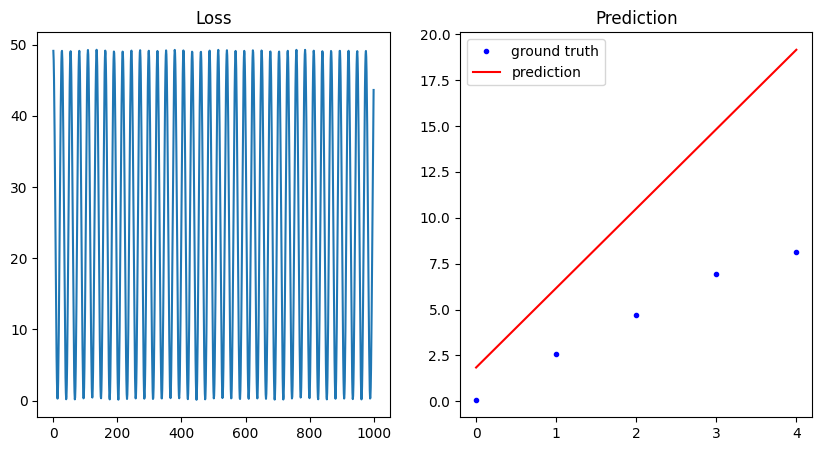

In [126]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")
plt.show()